In [1]:
from representation_matrices_explicit import GroupD6h, GroupD6D3hC6v, BaseGroup
from graphene.graphene import GrapheneHamiltonian, CosetReps
from utility_functions import irrep_decomposition, is_faithful, character_of_representation, projection_operator, ismember
import numpy as np
import sympy as sp

%load_ext autoreload
%autoreload 2


In [2]:
sp.init_printing()

In [3]:
graphene = GrapheneHamiltonian(with_spin=True)
graphene.run_setup(wyckoff_position='2b')

In [4]:
br_pz_G = graphene.generate_band_representation('g2m', 'G')
br_pz_K = graphene.generate_band_representation('g2m', 'K')
br_pz_M = graphene.generate_band_representation('g2m', 'M')
br_pz_spin_G = graphene.generate_band_representation('g8p', 'G')
br_pz_spin_K = graphene.generate_band_representation('g8p', 'K')
br_pz_spin_M = graphene.generate_band_representation('g8p', 'M')

In [36]:
def projection_operator_k_point(self: GrapheneHamiltonian, k_point_name: str, band_rep: list, irrep_in_decomp_name: str):
    if k_point_name.upper() == self.group_of_G.name:
        group_k = self.group_of_G
    elif k_point_name.upper() == self.group_of_K.name:
        group_k = self.group_of_K
    elif k_point_name.upper() == self.group_of_M.name:
        group_k = self.group_of_M
    else:
        raise NotImplementedError('k point not implemented')

    
    mu = group_k.group.irreducible_representations[irrep_in_decomp_name]
    d_mu = mu[0].shape[0] if isinstance(mu[0], sp.MatrixBase) or isinstance(mu[0], np.ndarray) else 1
    results = {}
    for i in range(d_mu):
        for j in range(d_mu):
            results[i, j] = projection_operator(mu, band_rep, i, j)

    return results
            
    

In [34]:
irrep_decomposition(
    character_of_representation(br_pz_spin_M), 
    graphene.group_of_M.group.irreducible_representations
)

{'g5p': 1, 'g5m': 1}

In [39]:
P_g4p = projection_operator_k_point(graphene, 'G', br_pz_G, 'g4p')
P_g2m = projection_operator_k_point(graphene, 'G', br_pz_G, 'g2m')

P_k5 = projection_operator_k_point(graphene, 'K', br_pz_K, 'g5')

P_m4p = projection_operator_k_point(graphene, 'M', br_pz_M, 'g4p')
P_m3m = projection_operator_k_point(graphene, 'M', br_pz_M, 'g3m')

P_g8p = projection_operator_k_point(graphene, 'G', br_pz_spin_G, 'g8p')
P_g7m = projection_operator_k_point(graphene, 'G', br_pz_spin_G, 'g7m')

P_k7 = projection_operator_k_point(graphene, 'K', br_pz_spin_K, 'g7')
P_k9 = projection_operator_k_point(graphene, 'K', br_pz_spin_K, 'g9')

P_m5p = projection_operator_k_point(graphene, 'M', br_pz_spin_M, 'g5p')
P_m5m = projection_operator_k_point(graphene, 'M', br_pz_spin_M, 'g5m')



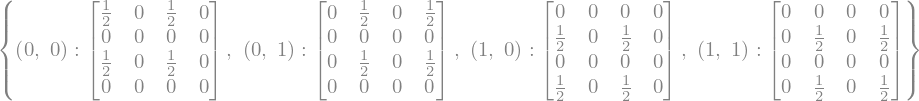

In [40]:
P_m5p

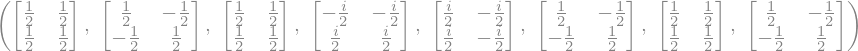

In [6]:
P_g4p, P_g2m, P_k5_00, P_k5_10, P_k5_01, P_k5_11, P_m4p, P_m3m

In [ ]:
P_g4p * P_m4p

In [ ]:
P_g4p * P_m3m

In [ ]:
[R for R in br_pz_M]

In [ ]:
graphene.subgroup_to_elements_mapping_in_full_group(graphene.group_of_M.group)

In [ ]:
{name: R for name, R in zip(graphene.subgroup_to_elements_mapping_in_full_group(graphene.group_of_M.group), br_pz_M)}

In [ ]:
np.array(graphene.group.elements)[graphene.subgroup_indices_in_full_group(graphene.group_of_M.group)]

In [ ]:
graphene.subgroup_to_subgroup_mapping(graphene.group_of_K.group, graphene.site_symmetry_group, graphene.coset_reps_ssg)[1].shape

{'g8p': 1, 'g7m': 1}

In [ ]:
graphene.lattice.a1, graphene.lattice.a2, graphene.group_of_M.point

In [ ]:
graphene.subgroup_indices_in_full_group(graphene.site_symmetry_group)

In [ ]:
{name: char for name, char in 
 zip(
     np.array(graphene.group.elements)[graphene.subgroup_indices_in_full_group(graphene.site_symmetry_group)],
     np.array(character_of_representation(graphene.generate_site_orbital_representation('g2m')))[graphene.subgroup_indices_in_full_group(graphene.site_symmetry_group)]
 )
}

In [ ]:
{name: char for name, char in 
 zip(
     np.array(graphene.group.elements)[graphene.subgroup_indices_in_full_group(graphene.group_of_K.group)],
     character_of_representation(graphene.generate_band_representation('g2m', 'K'))
 )
}

In [ ]:
graphene.subgroup_indices_in_full_group(graphene.site_symmetry_group)

In [ ]:
cm, em = graphene.group_to_subgroup_mapping(graphene.site_symmetry_group, 
                                   graphene.coset_reps_ssg, 
                                   from_subgroup=graphene.group_of_K.group)

In [ ]:
mappings = [[(c_row, c_col, e0, e) for c_col, e, e0 in zip(cmi, emi, graphene.subgroup_indices_in_full_group(graphene.group_of_K.group))] for c_row, (cmi, emi) in enumerate(zip(cm ,em))]

In [ ]:
mappings_tuples = np.array(mappings).reshape(-1, np.array(mappings).shape[-1])

In [ ]:
np.isin(mappings_tuples[:,3].flatten(), graphene.subgroup_indices_in_full_group(graphene.site_symmetry_group))

In [ ]:
new_array = mappings_tuples.astype(object)

# Replace columns 2 and 3 with lookup values
new_array[:,2] = np.array(graphene.group.elements)[mappings_tuples[:,2]]
new_array[:,3] = np.array(graphene.group.elements)[mappings_tuples[:,3]]

In [ ]:
mappings_tuples

In [ ]:
graphene.group_to_subgroup_mapping(graphene.site_symmetry_group, 
                                   graphene.coset_reps_ssg, 
                                   from_subgroup=graphene.group_of_K.group, extended_form=True)

In [ ]:
np.array(graphene.group.elements)[mappings_tuples[:, 3]]

In [ ]:
cm, em

In [ ]:
[(x1,x2) for (x1, x2)in zip(list(np.array(graphene.group.elements)[graphene.subgroup_indices_in_full_group(graphene.group_of_K.group)]), graphene.group_of_K.group.elements)]

In [ ]:
[ 0,  1,  2, 22, 23, 21, 18, 19, 20,  5,  3,  4], graphene.subgroup_indices_in_full_group(graphene.group_of_K.group)

In [ ]:
graphene.group_of_K.group.elements

In [ ]:
def calculate_phase(self, group_of_k, R, t_bra_idx):
    gR = np.array(self.group.xyz_representation())[self.subgroup_indices_in_full_group(group_of_k.group)][
             R] * group_of_k.point - group_of_k.point
    tau_bra = self.tau_vectors[t_bra_idx]
    phase = sp.exp(sp.I * (gR.dot(tau_bra)))

    elem = self.subgroup_to_elements_mapping_in_full_group(group_of_k.group)[R]
    
    return elem, gR

In [ ]:
graphene.tau_vectors

In [ ]:
[[calculate_phase(graphene, graphene.group_of_M, R, t_bra) for R in range(len(graphene.group_of_M.group.elements))] for t_bra in range(len(graphene.tau_vectors))]

In [ ]:
graphene.subgroup_to_elements_mapping_in_full_group()

In [ ]:
graphene_1 = GrapheneHamiltonian(with_spin=False)
graphene_1.run_setup(wyckoff_position='2b')

In [ ]:
{name: R for name, R in zip(graphene_1.group_of_M.group.elements, graphene_1.group_of_M.group.xyz_representation())}

In [ ]:
{name: R for name, R in zip(
    graphene_1.subgroup_to_elements_mapping_in_full_group(graphene_1.group_of_M.group), 
    np.array(graphene_1.group.xyz_representation())[graphene_1.subgroup_indices_in_full_group(graphene_1.group_of_M.group)]
)
}

In [ ]:
np.array(graphene.group.xyz_representation())[graphene.subgroup_indices_in_full_group(graphene.group_of_M.group)] == graphene.group_of_M.group.xyz_representation()

In [ ]:
{name: R for name, R in zip(graphene_1.group_of_M.group.elements, graphene_1.group_of_M.group.xyz_representation())}

In [ ]:
[[calculate_phase(R, t_bra) for R in range(len(graphene.group_of_K.group.elements))] for t_bra in range(len(graphene.tau_vectors))]

In [ ]:
(graphene.group.xyz_representation()[1] * graphene.group_of_K.k_point - graphene.group_of_K.k_point).dot(graphene.tau_vectors[0])

In [ ]:
irrep_decomposition(graphene.generate_band_representation('g2m', 'M'), graphene.group_of_M.group_of_k.irreducible_representations)

In [ ]:
calculate_phase(0, 0) == sp.Rational(-3,1) * graphene.lattice.b1

In [ ]:
calculate_phase(2, 0)

In [ ]:
graphene.lattice.a1, graphene.lattice.a2

In [ ]:
graphene.tau_vectors

In [ ]:
graphene.group_of_M.point

In [ ]:
graphene.lattice.get_reciprocal_vector([sp.Rational(1,3),sp.Rational(1,3),0])

In [ ]:
graphene.generate_band_representation('g2m', 'K')

In [ ]:
graphene.group_to_subgroup_mapping(
    graphene.site_symmetry_group, 
    graphene.coset_reps_ssg, 
    from_subgroup_indices=graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)
)


In [ ]:
graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)

In [ ]:
for ir_name, ir in graphene.group.irreducible_representations.items():
    if np.all(np.array(ir)[graphene.subgroup_indices_in_full_group(graphene.site_symmetry_group)] == graphene.site_symmetry_group.irreducible_representations['g4']):
        print(ir_name)

In [ ]:
graphene.group_to_subgroup_mapping(graphene.site_symmetry_group, graphene.coset_reps_ssg)[1]

In [ ]:
ismember(
    graphene.group_to_subgroup_mapping(graphene.group_of_K.group_of_k, graphene.coset_reps_ssg)[1], 
    graphene.group_to_subgroup_mapping(graphene.site_symmetry_group, graphene.coset_reps_ssg)[1]
)

In [ ]:
graphene.group_to_subgroup_mapping(graphene.site_symmetry_group, graphene.coset_reps_ssg)[1][:,graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)]

In [ ]:
graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)

In [ ]:
graphene.group_to_subgroup_mapping(
    graphene.site_symmetry_group,
    graphene.coset_reps_ssg,
    from_subgroup_indices=graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)
)

In [ ]:
[graphene.group.elements[i] for i in graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)]

In [ ]:
[graphene.group.elements[i] for i in [ 0,  1,  2, 21, 22, 23, 18, 19, 20,  3,  4,  5]]

In [ ]:
{name: char for name, char in 
 zip(
     graphene.subgroup_to_elements_mapping_in_full_group(graphene.group_of_K.group_of_k),
     character_of_representation(graphene.generate_subduced_representation_group_of_k('g2m', 'K'))
 )
}

In [ ]:
graphene.generate_subduced_representation_group_of_k('g2m', 'K')

In [ ]:
[graphene.group.elements[i] for i in graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)]

In [ ]:
graphene.subgroup_to_elements_mapping_in_full_group(graphene.group_of_K.group_of_k)

In [ ]:
graphene.subgroup_to_faithful_rep_mapping_in_full_group(graphene.group_of_K.group_of_k)

In [ ]:
{name: char for name, char in 
 zip(
     graphene.subgroup_to_elements_mapping_in_full_group(graphene.group_of_K.group_of_k),
     character_of_representation(graphene.generate_site_orbital_representation('g2m'))
 )
}

In [ ]:
graphene.group_to_subgroup_mapping(
    graphene.site_symmetry_group,
    graphene.coset_reps_ssg,
from_subgroup_indices=graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)
)

In [ ]:
graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)

In [ ]:
[i[graphene.subgroup_indices_in_full_group(graphene.group_of_K.group_of_k)] for i in 
    graphene.group_to_subgroup_mapping(
    graphene.site_symmetry_group,
    graphene.coset_reps_ssg
)[1]
]